In [13]:
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
df = pd.read_csv("world_population.csv")

In [19]:
df.head()

,Rank,CCA3,Country,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
3,213,ASM,American Samoa,Pago Pago,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00
4,203,AND,Andorra,Andorra la Vella,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00


In [20]:
df.columns

Index(['Rank', 'CCA3', 'Country', 'Capital', 'Continent', '2022 Population',
       '2020 Population', '2015 Population', '2010 Population',
       '2000 Population', '1990 Population', '1980 Population',
       '1970 Population', 'Area (km²)', 'Density (per km²)', 'Growth Rate',
       'World Population Percentage'],
      dtype='object')

In [21]:
df.isna().sum()

Rank                           0
CCA3                           0
Country                        0
Capital                        0
Continent                      0
2022 Population                0
2020 Population                0
2015 Population                0
2010 Population                0
2000 Population                0
1990 Population                0
1980 Population                0
1970 Population                0
Area (km²)                     0
Density (per km²)              0
Growth Rate                    0
World Population Percentage    0
dtype: int64

In [22]:
# Sort by 2022 population
top10 = df.sort_values("2022 Population", ascending=False).head(10)


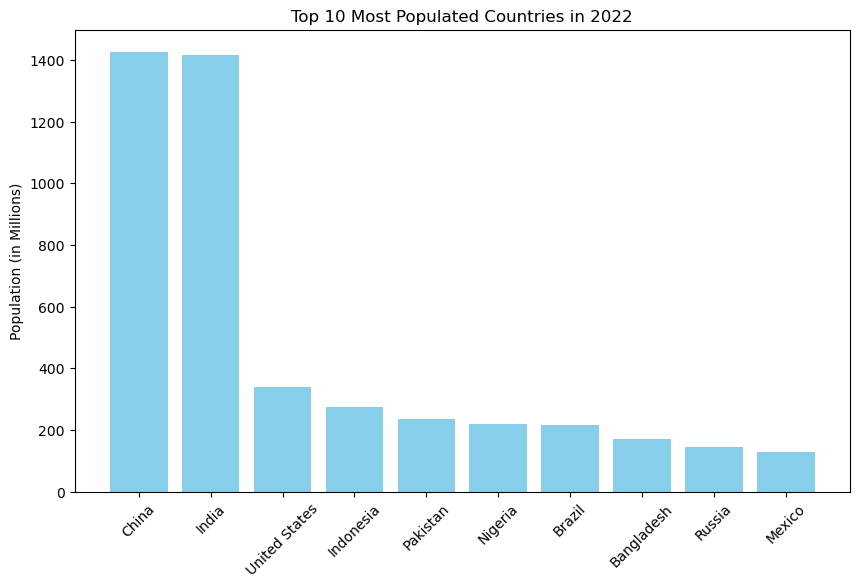

In [23]:

# Bar chart
plt.figure(figsize=(10,6))
plt.bar(top10["Country"], top10["2022 Population"]/1e6, color="skyblue")
plt.xticks(rotation=45)
plt.ylabel("Population (in Millions)")
plt.title("Top 10 Most Populated Countries in 2022")
plt.show()


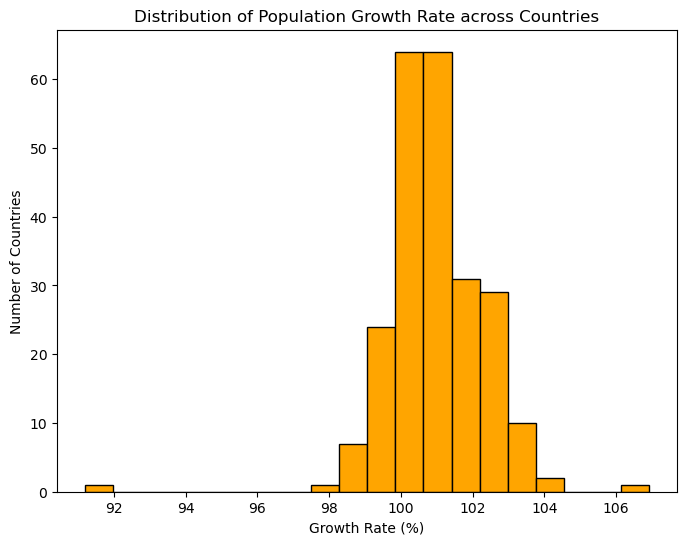

In [24]:
plt.figure(figsize=(8,6))
plt.hist(df["Growth Rate"]*100, bins=20, color="orange", edgecolor="black")
plt.xlabel("Growth Rate (%)")
plt.ylabel("Number of Countries")
plt.title("Distribution of Population Growth Rate across Countries")
plt.show()


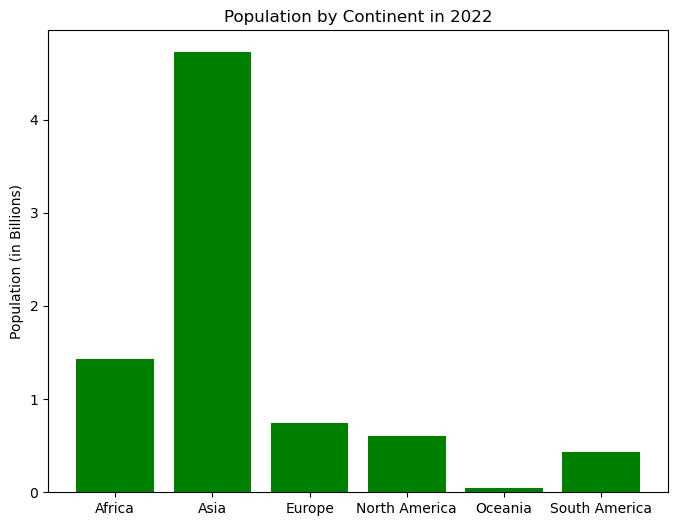

In [25]:
continent_pop = df.groupby("Continent")["2022 Population"].sum().reset_index()

plt.figure(figsize=(8,6))
plt.bar(continent_pop["Continent"], continent_pop["2022 Population"]/1e9, color="green")
plt.ylabel("Population (in Billions)")
plt.title("Population by Continent in 2022")
plt.show()



In [33]:
df1 = pd.read_csv("India_Age_Demographics.csv")

In [34]:
df1.head()

,Unnamed: 0,Age group,Male,Female,Total,Percentage (%),Cumulative Percentage
0,0,0–4,58632074,54174704,112806778,9.32,9.32
1,1,5–9,66300466,60627660,126928126,10.48,19.80
2,2,10–14,69418835,63290377,132709212,10.96,30.76
3,3,15–19,63982396,56544053,120526449,9.95,40.71
4,4,20–24,57584693,53839529,111424222,9.20,49.91


In [35]:
df1.columns

Index(['Unnamed: 0', 'Age group', 'Male', 'Female', 'Total', 'Percentage (%)',
       'Cumulative Percentage'],
      dtype='object')

In [40]:
# Drop extra index column if present
df1 = df.drop(columns=["Unnamed: 0"], errors="ignore")


In [41]:
df1.columns = df.columns.str.strip()

In [44]:
df1["Total"] = (
    df1["Total"]
    .astype(str)                # make sure all are strings
    .str.replace(",", "", regex=False)  # remove commas
    .str.strip()                # remove spaces
)

# drop rows where Total == "Total" (if header got duplicated as data)
df1 = df1[df1["Total"].str.isnumeric()]

# finally convert to float
df1["Total"] = df1["Total"].astype(float)

# create column in millions
df1["Total_Million"] = df1["Total"] / 1e6


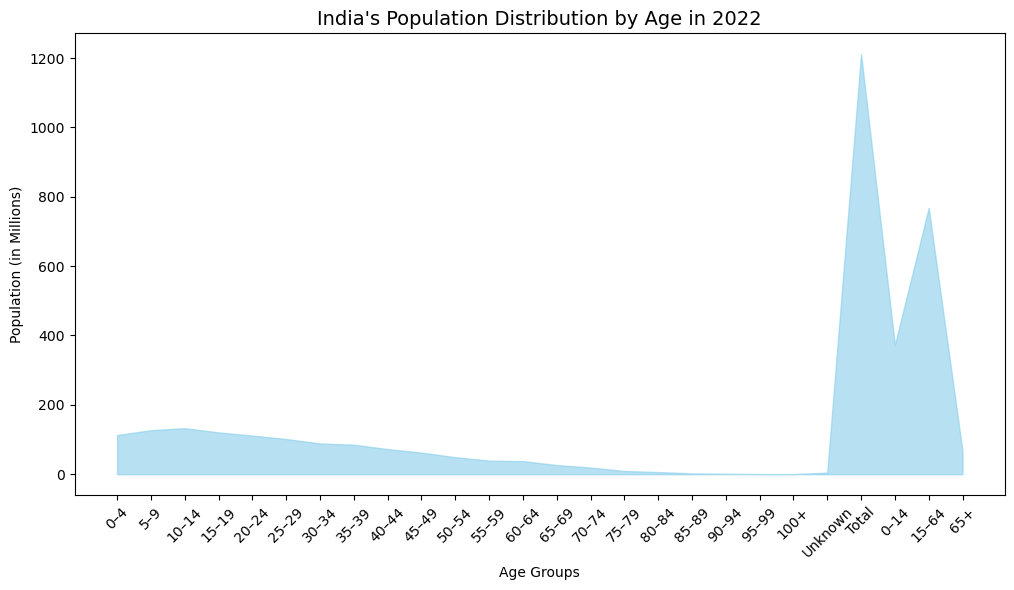

In [46]:

# Plot
plt.figure(figsize=(12,6))
plt.fill_between(df1["Age group"], df1["Total_Million"], color="skyblue", alpha=0.6)

# Titles
plt.title("India's Population Distribution by Age in 2022", fontsize=14)
plt.xlabel("Age Groups")
plt.ylabel("Population (in Millions)")
plt.xticks(rotation=45)
plt.show()


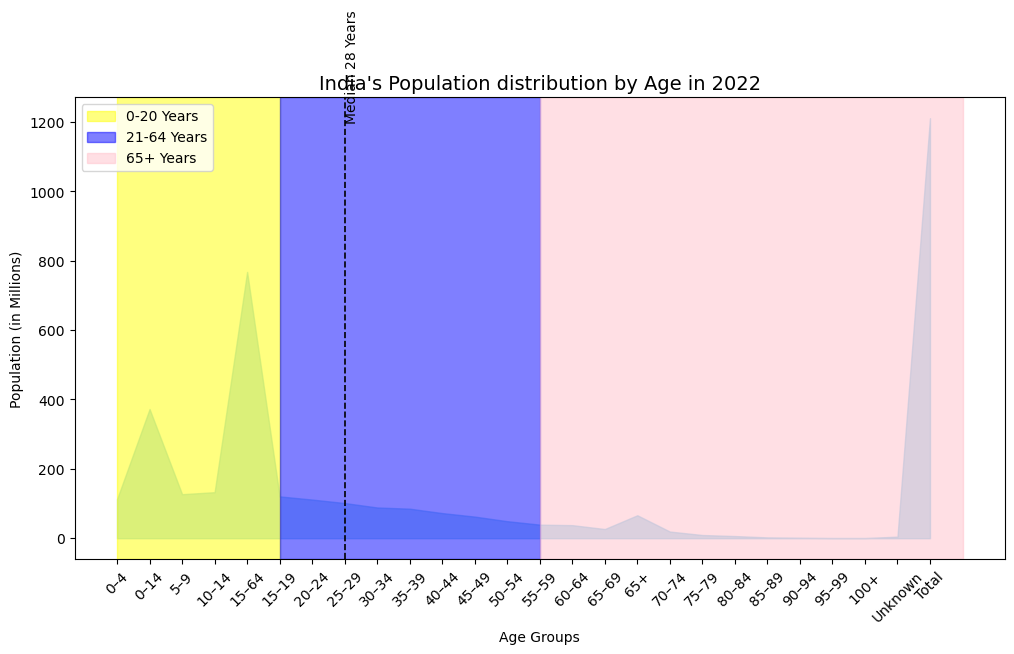

In [69]:


# Plot area chart
plt.figure(figsize=(12,6))
plt.fill_between(df1["Age group"], df1["Total_Million"], color="skyblue", alpha=0.6)

# Highlight age groups with colored spans
plt.axvspan(0, 5, color="yellow", alpha=0.5, label="0-20 Years")   # assuming bins like 0-4,5-9,10-14,15-19
plt.axvspan(5, 13, color="blue", alpha=0.5, label="21-64 Years")  # 20–64
plt.axvspan(13, len(df1), color="pink", alpha=0.5, label="65+ Years") # elderly

# Median age (example: 28 years)
plt.axvline(x=7, color="black", linestyle="--", linewidth=1.2)
plt.text(7, df1["Total_Million"].max()-5, "Median 28 Years", rotation=90, fontsize=10)

# Titles and labels
plt.title("India's Population distribution by Age in 2022", fontsize=14)
plt.xlabel("Age Groups")
plt.ylabel("Population (in Millions)")
plt.xticks(rotation=45)
plt.legend()
plt.show()

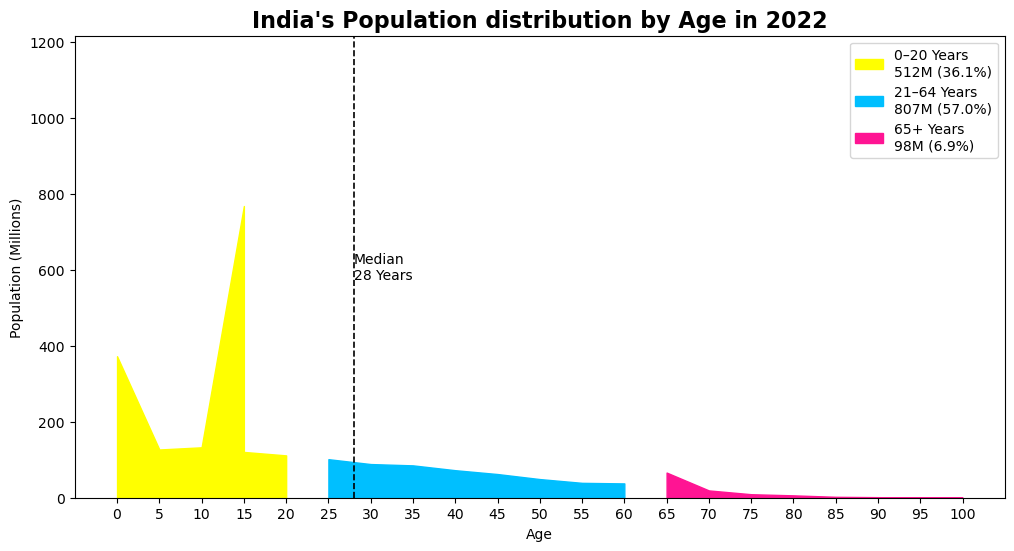

In [70]:

# Clean numeric columns
for col in ["Male", "Female", "Total"]:
    df1[col] = pd.to_numeric(df1[col].astype(str).str.replace(",", ""), errors="coerce")

# Extract numeric age from "Age group"
df1["Age_start"] = df1["Age group"].str.extract(r'(\d+)').astype(float)
df1 = df1.sort_values("Age_start")

# Convert to millions for plotting
df1["Total_Million"] = df1["Total"] / 1e6

# --- Plot area chart ---
plt.figure(figsize=(12,6))

# Highlight ranges
plt.fill_between(df1["Age_start"], df1["Total_Million"], 
                 where=(df1["Age_start"] <= 20), color="yellow", label="0–20 Years\n512M (36.1%)")

plt.fill_between(df1["Age_start"], df1["Total_Million"], 
                 where=(df1["Age_start"] > 20) & (df1["Age_start"] <= 64), 
                 color="deepskyblue", label="21–64 Years\n807M (57.0%)")

plt.fill_between(df1["Age_start"], df1["Total_Million"], 
                 where=(df1["Age_start"] > 64), color="deeppink", label="65+ Years\n98M (6.9%)")

# Median age line
plt.axvline(x=28, color="black", linestyle="--", linewidth=1.2)
plt.text(28, df1["Total_Million"].max()/2, "Median\n28 Years", ha="left", va="center", fontsize=10)

# Title & labels
plt.title("India's Population distribution by Age in 2022", fontsize=16, weight="bold")
plt.xlabel("Age")
plt.ylabel("Population (Millions)")
plt.xticks(range(0, 101, 5))  # show ages every 5 years
plt.ylim(0, df1["Total_Million"].max()+5)
plt.legend(loc="upper right")

plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_29188\3900490644.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Age group", y="Total", data=df1, palette="viridis")


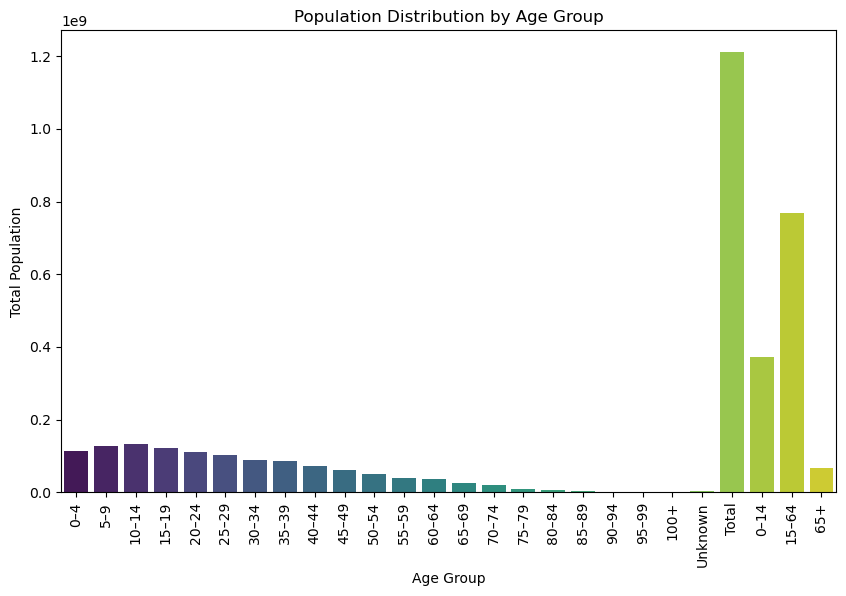

In [56]:

import seaborn as sns

plt.figure(figsize=(10,6))
sns.barplot(x="Age group", y="Total", data=df1, palette="viridis")
plt.title("Population Distribution by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Total Population")
plt.xticks(rotation=90)
plt.show()

In [64]:
# Convert Male and Female columns to numeric (remove commas if present)
df1["Male"] = pd.to_numeric(df1["Male"].astype(str).str.replace(",", ""), errors="coerce")
df1["Female"] = pd.to_numeric(df1["Female"].astype(str).str.replace(",", ""), errors="coerce")


<Figure size 1000x600 with 0 Axes>

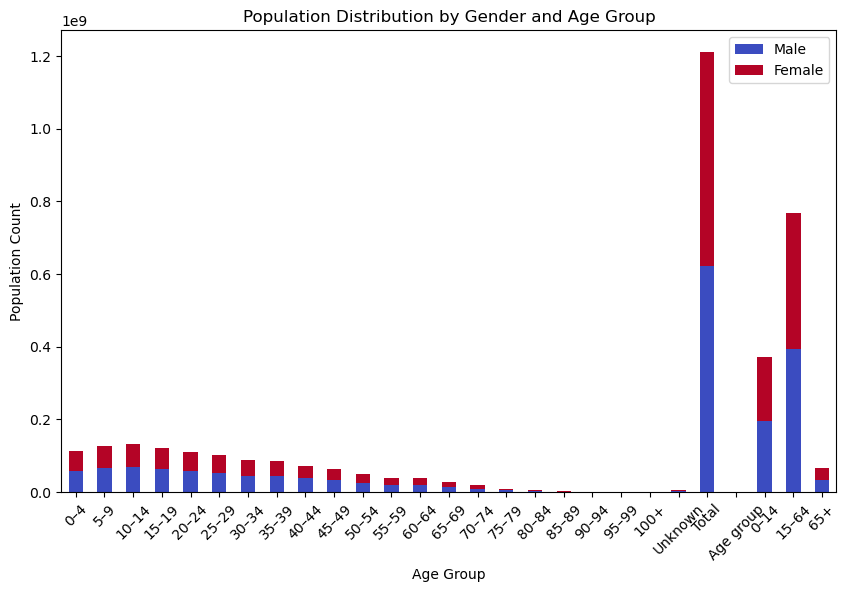

In [65]:
plt.figure(figsize=(10,6))
df.set_index("Age group")[["Male", "Female"]].plot(kind="bar", stacked=True, figsize=(10,6), colormap="coolwarm")
plt.title("Population Distribution by Gender and Age Group")
plt.xlabel("Age Group")
plt.ylabel("Population Count")
plt.xticks(rotation=45)
plt.show()

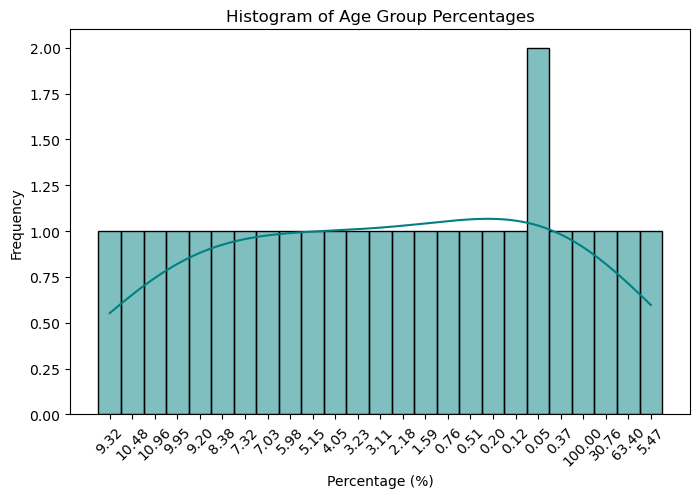

In [66]:
# --- 3. Histogram for Age Percentage Distribution ---
plt.figure(figsize=(8,5))
sns.histplot(df1["Percentage (%)"], bins=10, kde=True, color="teal")
plt.title("Histogram of Age Group Percentages")
plt.xlabel("Percentage (%)")
plt.xticks(rotation=45)
plt.ylabel("Frequency")
plt.show()